In [1]:
import numpy
import logging
import pycbc
from pycbc.inference import io
from pycbc.inference import models

In [2]:
%matplotlib notebook
from matplotlib import pyplot

In [3]:
pycbc.init_logging(True)

In [4]:
fn = '../BH-Spectroscopy-GW190521/posteriors/kerr/220_330/KERR-220_330-07MS.hdf'
fp = io.loadfile(fn, 'r')

In [5]:
cp = fp.read_config_file()
psds = fp.read_psds()
data = fp.read_data()

In [6]:
model = models.read_from_config(cp, data=data, psds=psds)

2021-08-26 07:21:33,586 Setting up priors for each parameter
2021-08-26 07:21:33,591 No sampling_params section read from config file
2021-08-26 07:21:33,592 Loading waveform transforms
2021-08-26 07:21:33,598 Determining analysis times to use
2021-08-26 07:21:33,599 Padding H1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.
2021-08-26 07:21:33,599 Padding L1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.
2021-08-26 07:21:33,600 Padding V1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.


In [7]:
samples = fp.read_samples(list(fp['samples'].keys()))

In [8]:
maxidx = samples.loglikelihood.argmax()
params = {p: samples[p][maxidx] for p in model.variable_params}

In [9]:
model.update(**params)
print(model.loglikelihood)

-1240538.0178208752


In [12]:
# try calculating 
# -(1/2)<d-h, d-h> = <h, d>/2 + <d, h>/2 - <h, h>/2 - <d, d>/2
wfs = model.get_waveforms()
gated_wfs = model.get_gated_waveforms()
dfs = model.get_data()
gated_dfs = model.get_gated_data()

logl = 0.
for det in wfs:
    invpsd = model._invpsds[det]
    h = wfs[det]
    gated_h = gated_wfs[det]
    gated_h *= invpsd
    d = dfs[det]
    gated_d = gated_dfs[det]
    gated_d *= invpsd
    slc = slice(model._kmin[det], model._kmax[det])
    hd = h[slc].inner(gated_d[slc]).real
    dh = d[slc].inner(gated_h[slc]).real
    hh = h[slc].inner(gated_h[slc]).real
    dd = d[slc].inner(gated_d[slc]).real
    logl += 2 * invpsd.delta_f * (hd + dh - hh - dd)

print(logl)

-1240538.0178142104


In [13]:
fp.close()

## 221 effect

In [30]:
# does this fix the 221 issues?
fn = '../injections/imrdraws/inj100-batch_runs/inj06/samples-220_221-21.hdf'
fp = io.loadfile(fn, 'r')

In [31]:
cp = fp.read_config_file()
psds = fp.read_psds()
data = fp.read_data()

In [32]:
model = models.read_from_config(cp, data=data, psds=psds)

2021-08-26 12:07:52,061 Setting up priors for each parameter
2021-08-26 12:07:52,064 No sampling_params section read from config file
2021-08-26 12:07:52,065 Loading waveform transforms
2021-08-26 12:07:52,074 Determining analysis times to use
2021-08-26 12:07:52,075 Padding H1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.
2021-08-26 12:07:52,076 Padding L1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.
2021-08-26 12:07:52,077 Padding V1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.


In [33]:
samples = fp.read_samples(list(fp['samples'].keys()))

In [34]:
maxidx = samples.loglikelihood.argmax()
params = {p: samples[p][maxidx] for p in model.variable_params}
print(params)

{'final_mass': 499.9194837717015, 'final_spin': -0.9899979739166659, 'polarization': 2.9212370070158227, 'inclination': 1.6764699640701861, 'logamp220': -19.00001729065916, 'phi220': 0.4863014617095732, 'amp221': 1.702286795013982, 'phi221': 2.166519267257661}


In [35]:
model.update(**params)
print(model.loglikelihood)

-2084401.05162497


In [36]:
# try calculating 
# -(1/2)<d-h, d-h> = <h, d>/2 + <d, h>/2 - <h, h>/2 - <d, d>/2
wfs = model.get_waveforms()
gated_wfs = model.get_gated_waveforms()
dfs = model.get_data()
gated_dfs = model.get_gated_data()

logl = 0.
for det in wfs:
    invpsd = model._invpsds[det]
    h = wfs[det]
    gated_h = gated_wfs[det]
    gated_h *= invpsd
    d = dfs[det]
    gated_d = gated_dfs[det]
    gated_d *= invpsd
    slc = slice(model._kmin[det], model._kmax[det])
    hd = h[slc].inner(gated_d[slc]).real
    dh = d[slc].inner(gated_h[slc]).real
    hh = h[slc].inner(gated_h[slc]).real
    dd = d[slc].inner(gated_d[slc]).real
    logl += 2 * invpsd.delta_f * (hd + dh - hh - dd)

print(logl)

-2084401.0513747819


<IPython.core.display.Javascript object>


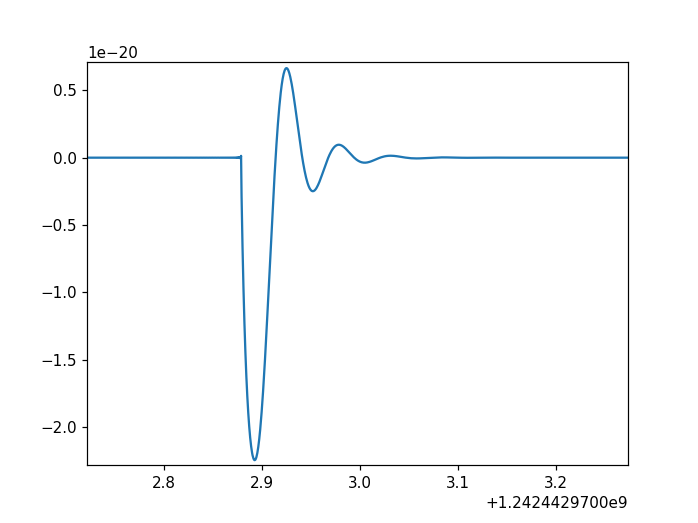

<IPython.core.display.Javascript object>


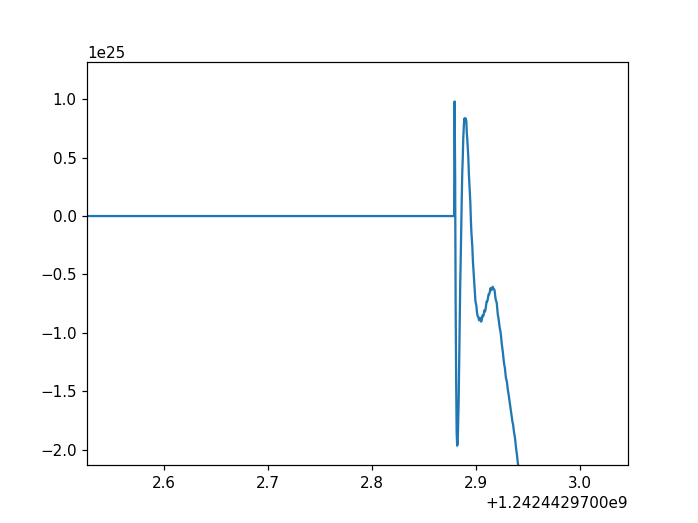

In [39]:
fig, ax = pyplot.subplots()
h = wfs['L1'].to_timeseries()
ax.plot(h.sample_times, h)
fig.show()

fig, ax = pyplot.subplots()
gh = gated_wfs['L1'].to_timeseries()
ax.plot(gh.sample_times, gh)
fig.show()

In [40]:
fp.close()

### 220

In [41]:
fn = '../injections/imrdraws/inj100-batch_runs/inj06/samples-220-21.hdf'
fp = io.loadfile(fn, 'r')

In [42]:
cp = fp.read_config_file()
psds = fp.read_psds()
data = fp.read_data()

In [43]:
model = models.read_from_config(cp, data=data, psds=psds)

2021-08-26 12:11:46,820 Setting up priors for each parameter
2021-08-26 12:11:46,823 No sampling_params section read from config file
2021-08-26 12:11:46,825 Loading waveform transforms
2021-08-26 12:11:46,832 Determining analysis times to use
2021-08-26 12:11:46,833 Padding H1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.
2021-08-26 12:11:46,834 Padding L1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.
2021-08-26 12:11:46,835 Padding V1 analysis start and end times by 4 (= psd-inverse-length/2) seconds to account for PSD wrap around effects.


In [44]:
samples = fp.read_samples(list(fp['samples'].keys()))

In [49]:
maxidx = samples.loglikelihood.argmax()
params = {p: samples[p][maxidx] for p in model.variable_params}
print(params)

{'final_mass': 238.41479215393244, 'final_spin': 0.49701360475486744, 'polarization': 2.043278130029269, 'inclination': 1.769247704774201, 'logamp220': -20.58413559316471, 'phi220': 5.258523743983401}


In [46]:
model.update(**params)
print(model.loglikelihood)

-2084784.3241021154


In [47]:
# try calculating 
# -(1/2)<d-h, d-h> = <h, d>/2 + <d, h>/2 - <h, h>/2 - <d, d>/2
wfs = model.get_waveforms()
gated_wfs = model.get_gated_waveforms()
dfs = model.get_data()
gated_dfs = model.get_gated_data()

logl = 0.
for det in wfs:
    invpsd = model._invpsds[det]
    h = wfs[det]
    gated_h = gated_wfs[det]
    gated_h *= invpsd
    d = dfs[det]
    gated_d = gated_dfs[det]
    gated_d *= invpsd
    slc = slice(model._kmin[det], model._kmax[det])
    hd = h[slc].inner(gated_d[slc]).real
    dh = d[slc].inner(gated_h[slc]).real
    hh = h[slc].inner(gated_h[slc]).real
    dd = d[slc].inner(gated_d[slc]).real
    logl += 2 * invpsd.delta_f * (hd + dh - hh - dd)

print(logl)

-2084784.3241042513


<IPython.core.display.Javascript object>


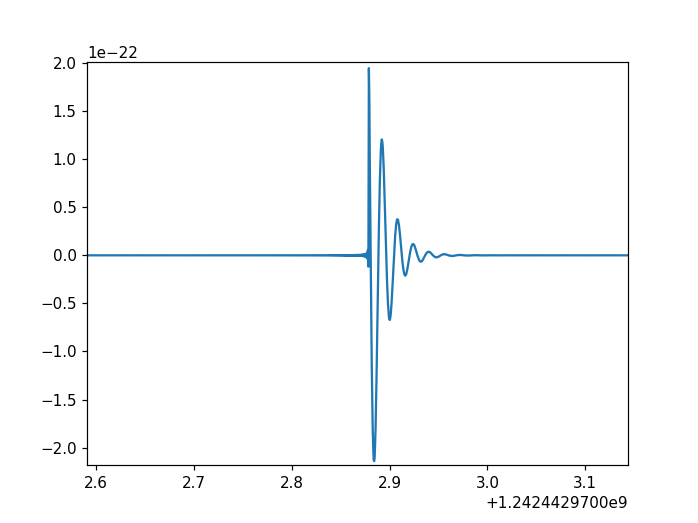

<IPython.core.display.Javascript object>


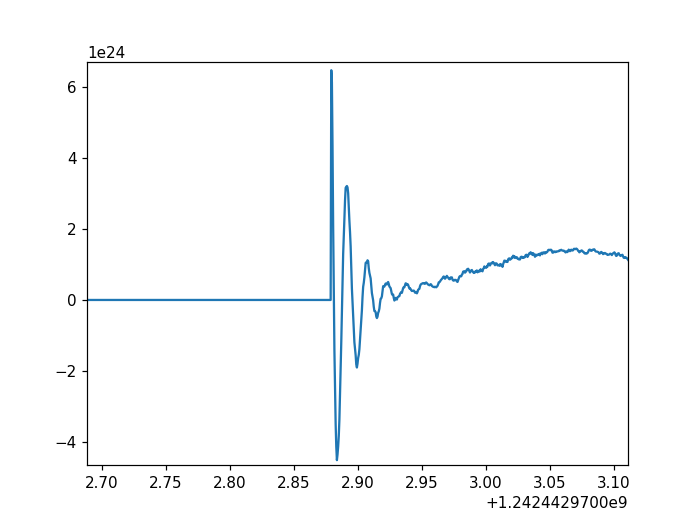

In [48]:
fig, ax = pyplot.subplots()
h = wfs['L1'].to_timeseries()
ax.plot(h.sample_times, h)
fig.show()

fig, ax = pyplot.subplots()
gh = gated_wfs['L1'].to_timeseries()
ax.plot(gh.sample_times, gh)
fig.show()

In [29]:
fp.close()